<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/seta_girando_fasor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

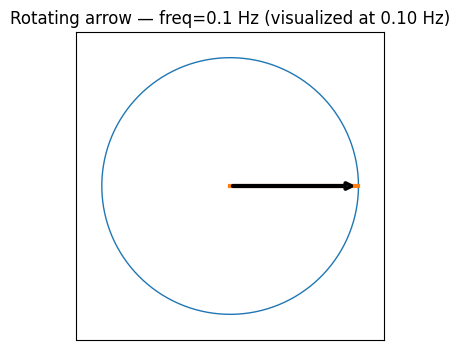

In [13]:
# Colab-ready: rotating arrow animation (clock-like)
# Comments are in English, as requested.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# --------- Parameters you can edit ----------
freq = 0.1          # Hz (physical rotation frequency)
visual_scale = 1.0  # scale down visual speed; 60 Hz / 60 = 1 Hz on screen
duration_s = 10.0     # seconds of video
fps = 60             # frames per second for the animation
radius = 1.0         # arrow length
# -------------------------------------------

# Derived quantities
omega_physical = 2.0 * np.pi * freq                 # rad/s (physical)
omega_visual = omega_physical / visual_scale        # rad/s (visualized)
n_frames = int(duration_s * fps)

# Set up figure
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect("equal")
ax.set_xlim(-1.2 * radius, 1.2 * radius)
ax.set_ylim(-1.2 * radius, 1.2 * radius)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(f"Rotating arrow — freq={freq} Hz (visualized at {freq/visual_scale:.2f} Hz)")

# Draw a static circle just to mimic a clock face
theta = np.linspace(0.0, 2.0 * np.pi, 400)
ax.plot(radius * np.cos(theta), radius * np.sin(theta), linewidth=1.0)

# Create a line for the arrow shaft and a head with annotate (updates each frame)
shaft, = ax.plot([0.0, radius], [0.0, 0.0], linewidth=3.0)  # initial horizontal
head = ax.annotate(
    "",
    xy=(radius, 0.0),
    xytext=(0.0, 0.0),
    arrowprops=dict(arrowstyle="-|>", lw=3),
)




In [14]:
def frame_to_time(frame_index):
    # Map frame index to time in seconds
    t = frame_index / fps
    return t

def update(frame_index):
    # Compute current angle (visualized)
    t = frame_to_time(frame_index)
    angle = omega_visual * t
    x = radius * np.cos(angle)
    y = radius * np.sin(angle)

    # Update shaft
    shaft.set_data([0.0, x], [0.0, y])

    # Update head
    head.set_position((0.0, 0.0))  # tail at origin
    head.xy = (x, y)               # head at (x, y)

    return shaft, head

anim = FuncAnimation(fig, update, frames=n_frames, interval=1000.0 / fps, blit=True)

In [15]:
# Display as HTML5 video (more reliable than jshtml in Colab)
html_video = anim.to_html5_video()
plt.close(fig)
display(HTML(html_video))

# Notes:
# - If freq = 60 Hz and fps = 60, without visual_scale you would alias (arrow looks static),
#   because angle step per frame is 2π. visual_scale prevents this.
# - To see true-speed 60 Hz on a high-speed display, set visual_scale = 1.0 and increase fps,
#   but typical monitors will still show aliasing.